In [39]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns
from scipy.stats import chi2_contingency

obs = pd.read_csv('observations.csv')
species =pd.read_csv('species_info.csv')
species2=species
print(obs.head())
print(species.head())




            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85
  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic 

We have two datasets, one contains the number of observationsa and in which national park a species was seen. The second contains species and their common names and their conservation status (if of concern)
We explored conservation status of different species in the national parks.


Vascular plants (77%) followed by birds (8.9%) were the most frequently recorded species groups  

In [40]:
print(species.groupby("category").size())
print(len(species))

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64
5824


[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']
There are 4 categories of conservation status


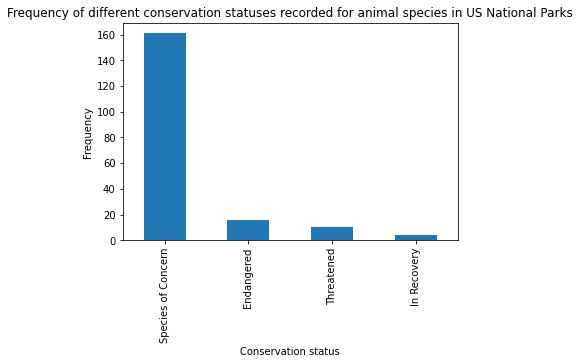

The majority of animal species with a protected conservation status were recorded as a Species of Concern


In [41]:
print(species.conservation_status.unique())
print('There are 4 categories of conservation status')
species['conservation_status'].value_counts().plot(kind='bar')
plt.ylabel('Frequency')
plt.xlabel('Conservation status')
plt.title('Frequency of different conservation statuses recorded for animal species in US National Parks')
plt.show()
print('The majority of animal species with a protected conservation status were recorded as a Species of Concern')



We next looked at whether certain animal groups differed in their distribution amongst conservation statuses


In [42]:
print(species.category.unique())
#first going to make indiv barplots for each category then do a stacked barplot
species.fillna('No Intervention', inplace=True)
species_grouped= species.groupby(['category']).conservation_status.value_counts()
#changes the series back to a panda df and gives us count as column 
species_grouped= species_grouped.rename('count').reset_index()
print(species_grouped)



['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']
             category conservation_status  count
0           Amphibian     No Intervention     73
1           Amphibian  Species of Concern      4
2           Amphibian          Threatened      2
3           Amphibian          Endangered      1
4                Bird     No Intervention    442
5                Bird  Species of Concern     72
6                Bird          Endangered      4
7                Bird         In Recovery      3
8                Fish     No Intervention    116
9                Fish  Species of Concern      4
10               Fish          Threatened      4
11               Fish          Endangered      3
12             Mammal     No Intervention    176
13             Mammal  Species of Concern     28
14             Mammal          Endangered      7
15             Mammal          Threatened      2
16             Mammal         In Recovery      1
17  Nonvascular Plant     No Inte

                         count                                                 \
conservation_status Endangered In Recovery No Intervention Species of Concern   
category                                                                        
Amphibian                  1.0         NaN            73.0                4.0   
Bird                       4.0         3.0           442.0               72.0   
Fish                       3.0         NaN           116.0                4.0   
Mammal                     7.0         1.0           176.0               28.0   
Nonvascular Plant          NaN         NaN           328.0                5.0   
Reptile                    NaN         NaN            74.0                5.0   
Vascular Plant             1.0         NaN          4424.0               43.0   

                                
conservation_status Threatened  
category                        
Amphibian                  2.0  
Bird                       NaN  
Fish                    

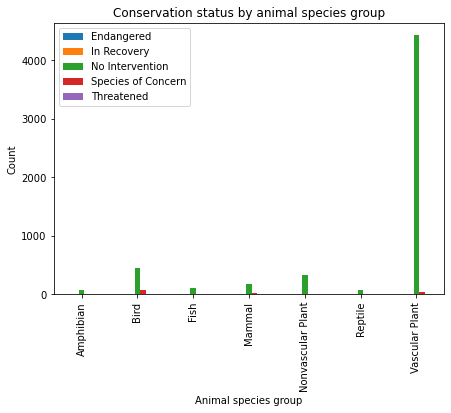

In [43]:
#unstack is way of getting data into wide format
print(species_grouped.set_index(['category','conservation_status']).unstack())

species_grouped.set_index(['category','conservation_status']).unstack().plot.bar(figsize=(7, 5))
plt.title('Conservation status by animal species group')
plt.xlabel('Animal species group')
plt.ylabel('Count')
plt.legend(['Endangered','In Recovery','No Intervention','Species of Concern','Threatened'])



Vascular plants and birds have the largest counts of species that are classified as 'no intervention'. Due to the large majority of sightings being of species needing no intervention we cannot easily assess which groups have more endangered species etc. so we need to explore these as proportions of the number of each group's species.

                         count                                                 \
conservation_status Endangered In Recovery No Intervention Species of Concern   
category                                                                        
Amphibian                  1.0         NaN            73.0                4.0   
Bird                       4.0         3.0           442.0               72.0   
Fish                       3.0         NaN           116.0                4.0   
Mammal                     7.0         1.0           176.0               28.0   
Nonvascular Plant          NaN         NaN           328.0                5.0   
Reptile                    NaN         NaN            74.0                5.0   
Vascular Plant             1.0         NaN          4424.0               43.0   

                                
conservation_status Threatened  
category                        
Amphibian                  2.0  
Bird                       NaN  
Fish                    

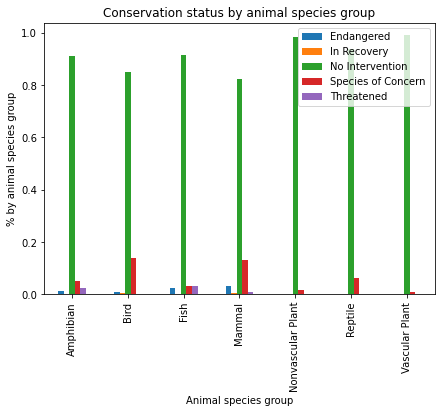

In [44]:
species_grouped_norm = species_grouped.set_index(['category','conservation_status']).unstack()
print(species_grouped_norm)
#sums by row with axis 1
total_species = species_grouped_norm.sum(axis=1)
#divide by column 
species_grouped_norm = species_grouped_norm.div(total_species, axis=0)
print(species_grouped_norm)
species_grouped_norm.plot.bar(figsize=(7, 5))
plt.title('Conservation status by animal species group')
plt.xlabel('Animal species group')
plt.ylabel('% by animal species group')
plt.legend(['Endangered','In Recovery','No Intervention','Species of Concern','Threatened'])


From this plot we can see that as a proportion of all of their species group records, the largest number of endangered species are in the fish and mammal groups. Reptiles, vascular non vascular plants had fewer recordings and of these, the species sighted were all species of concern (or not recorded).

                         count                                                 \
conservation_status Endangered In Recovery No Intervention Species of Concern   
category                                                                        
Amphibian                  1.0         NaN            73.0                4.0   
Bird                       4.0         3.0           442.0               72.0   
Fish                       3.0         NaN           116.0                4.0   
Mammal                     7.0         1.0           176.0               28.0   
Nonvascular Plant          NaN         NaN           328.0                5.0   
Reptile                    NaN         NaN            74.0                5.0   
Vascular Plant             1.0         NaN          4424.0               43.0   

                                
conservation_status Threatened  
category                        
Amphibian                  2.0  
Bird                       NaN  
Fish                    

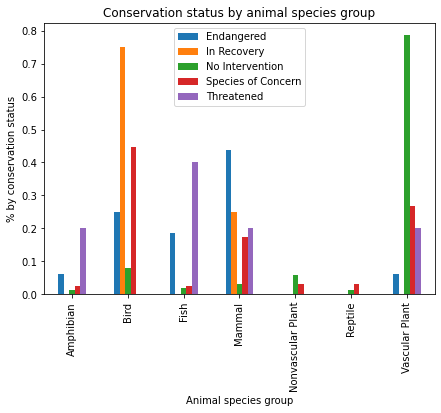

In [45]:
species_grouped_norm = species_grouped.set_index(['category','conservation_status']).unstack()
print(species_grouped_norm)
#sums by row with axis 1
total_species = species_grouped_norm.sum(axis=0)
#divide by column 
species_grouped_norm = species_grouped_norm.div(total_species, axis=1)
print(species_grouped_norm)
species_grouped_norm.plot.bar(figsize=(7, 5))
plt.title('Conservation status by animal species group')
plt.xlabel('Animal species group')
plt.ylabel('% by conservation status')
plt.legend(['Endangered','In Recovery','No Intervention','Species of Concern','Threatened'])

When we look at the composition of each conservation status group we can see variation in which species groups predominate. For the endangered status most species are mammals (44%) followed by birds (25%). Additionally, although these two species groups predominate the endangered status species, birds (75%) and mammals (25%) make up all the species determined to be in recovery status. 

We want to look and see if there is a significant difference in these representation of different species groups in terms of protected vs unprotected

In [51]:
#class as protected or not by everything that doesnt = no intervention is classed as protected
species2['is_protected'] = species2.conservation_status != 'No Intervention'
print(species2)
category_counts = species2.groupby(['category', 'is_protected'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name')\
                        .reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']

print(category_counts)

category_counts['percent_protected'] = category_counts.protected / \
                                      (category_counts.protected + category_counts.not_protected) * 100

category_counts

            category                scientific_name  \
0             Mammal  Clethrionomys gapperi gapperi   
1             Mammal                      Bos bison   
2             Mammal                     Bos taurus   
3             Mammal                     Ovis aries   
4             Mammal                 Cervus elaphus   
...              ...                            ...   
5819  Vascular Plant               Solanum parishii   
5820  Vascular Plant                  Solanum xanti   
5821  Vascular Plant         Parthenocissus vitacea   
5822  Vascular Plant              Vitis californica   
5823  Vascular Plant            Tribulus terrestris   

                                           common_names conservation_status  \
0                              Gapper's Red-Backed Vole     No Intervention   
1                                 American Bison, Bison     No Intervention   
2     Aurochs, Aurochs, Domestic Cattle (Feral), Dom...     No Intervention   
3     Domestic Sheep, M

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


It looks like birds and mammals have the largest numbers of protected species- but is this statistically significant? also, vascular plants have the lowest number of protected species- does this differ significantly from mammals? we must do a chi2 to find out.

In [53]:

contingency1 = [[30, 146],
              [75, 413]]
chi2_contingency(contingency1)

#non sig birds vs mammals, p =0.69

contingency1 = [[30, 146],
              [4216, 46]]
chi2_contingency(contingency1)
#sig difference vasc plants vs mammals p<0.001

(2717.64917459303,
 0.0,
 1,
 array([[ 168.38575935,    7.61424065],
        [4077.61424065,  184.38575935]]))

Mammals and birds do not have a significant difference in the proportions of protected or not protected groups. However, vascular plants have significantly larger proportions of unprotected species than protected when compared to mammals.

In [48]:

print(obs.sort_values(by='observations',ascending=False))
print(obs.observations.nunique())
print(len(obs))

                 scientific_name                            park_name  \
11281     Lycopodium tristachyum            Yellowstone National Park   
1168          Castilleja miniata            Yellowstone National Park   
20734        Cryptantha fendleri            Yellowstone National Park   
8749   Dracocephalum parviflorum            Yellowstone National Park   
7112           Bidens tripartita            Yellowstone National Park   
...                          ...                                  ...   
20375          Sambucus mexicana  Great Smoky Mountains National Park   
18823               Rana sierrae  Great Smoky Mountains National Park   
16054         Strix occidentalis  Great Smoky Mountains National Park   
15511         Collomia tinctoria  Great Smoky Mountains National Park   
9418             Corydalis aurea                  Bryce National Park   

       observations  
11281           321  
1168            317  
20734           316  
8749            316  
7112         

The most frequently observed species overall was Lycopodium tristachyum, a moss. However, we could see from this dataset that there is 23296 rows of data but only ~300 unique values. Therefore, there are duplicates either due to different parks recording same species or the same species being recorded >1 x. So we need to tidy the data a bit more to find out what species are most commonly identified across all parks in the data.
We're going to join the 2 datasets of species and observations together and then combine all the recordings of the same species of animal across different sites.

In [27]:
join_df = species.merge(obs, on='scientific_name', how='outer')
print(join_df.head(10))
#weve joined the 2 tables
#new df with national park column removed
join_2 = join_df.drop(["park_name","scientific_name"], axis=1)
print(join_2.head())
#group by common name and then sum
most_freq = join_2.groupby('common_names').sum().reset_index().sort_values(by="observations",ascending=False)
print(most_freq.head(10))


  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal  Clethrionomys gapperi gapperi   
2   Mammal  Clethrionomys gapperi gapperi   
3   Mammal  Clethrionomys gapperi gapperi   
4   Mammal                      Bos bison   
5   Mammal                      Bos bison   
6   Mammal                      Bos bison   
7   Mammal                      Bos bison   
8   Mammal                     Bos taurus   
9   Mammal                     Bos taurus   

                                        common_names conservation_status  \
0                           Gapper's Red-Backed Vole                 NaN   
1                           Gapper's Red-Backed Vole                 NaN   
2                           Gapper's Red-Backed Vole                 NaN   
3                           Gapper's Red-Backed Vole                 NaN   
4                              American Bison, Bison                 NaN   
5                              American Bison, B

Across, the parks the most common species identifed was Dicranum moss. All of the top 10 species identified were plants (mostly moss species, 70%). Lets go a bit broader and group things like moss all together so we can see what other types of species are observed.
*For this bit I have used code from the sample solution (we havent learned this yet on data science path)-but I will look at birds, not mammals*

In [60]:
#split species name into 1 word chunks for each line
from itertools import chain
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

common_Names = species[species.category == "Bird"]\
    .common_names\
    .apply(remove_punctuations)\
    .str.split().tolist()

common_Names[:6]

[['Brewsters', 'Warbler'],
 ['Coopers', 'Hawk'],
 ['Northern', 'Goshawk'],
 ['SharpShinned', 'Hawk'],
 ['Golden', 'Eagle'],
 ['RedTailed', 'Hawk']]

In [61]:
#remove duplicate words in a species eg. American bison bison
cleanRows = []

for item in common_Names:
    item = list(dict.fromkeys(item))
    cleanRows.append(item)
    
cleanRows[:6]

[['Brewsters', 'Warbler'],
 ['Coopers', 'Hawk'],
 ['Northern', 'Goshawk'],
 ['SharpShinned', 'Hawk'],
 ['Golden', 'Eagle'],
 ['RedTailed', 'Hawk']]

In [62]:
#make into 1 list
res = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in cleanRows))
res[:6]

['Brewsters', 'Warbler', 'Coopers', 'Hawk', 'Northern', 'Goshawk']

In [63]:
#counts the number of occurences of each word eg. vole
words_counted = []

for i in res:
    x = res.count(i)
    words_counted.append((i,x))

pd.DataFrame(set(words_counted), columns =['Word', 'Count']).sort_values("Count", ascending = False).head(10)

,Word,Count
21,Warbler,59
248,Sparrow,29
437,American,21
304,Northern,20
236,Owl,18
428,Common,18
216,Flycatcher,18
326,Woodpecker,12
162,Western,12
287,Sandpiper,11


Warblers were the most commonly identifed bird. How many different kinds of warblers are there in the park and how many are protected?


In [105]:
#species['is_warbler'] = species.common_names.str.contains(r"\bWarbler\b", regex = True)
species['is_warbler'] = species.common_names.str.contains("Warbler")
species.sample(10)
print(species.sort_values('is_warbler', ascending=False))
species[species.is_warbler]
warblers = species[species['is_warbler'] == True]
print(warblers.common_names.nunique())


warbler_observations = obs.merge(species[species.is_warbler])
print(warbler_observations.head())


protected_warblers = warbler_observations[warbler_observations['is_protected'] == True]
print(protected_warblers)
print(len(protected_warblers))

            category                 scientific_name  \
3204            Bird              Setophaga coronata   
265             Bird         Limnothlypis swainsonii   
279             Bird             Vermivora lawrencei   
278             Bird   Vermivora chrysoptera X pinus   
277             Bird                Vermivora celata   
...              ...                             ...   
1963  Vascular Plant  Carex atlantica ssp. atlantica   
1962  Vascular Plant                 Carex atlantica   
1961  Vascular Plant               Carex appalachica   
1960  Vascular Plant                 Carex annectens   
5823  Vascular Plant             Tribulus terrestris   

                                           common_names conservation_status  \
3204                              Yellow-Rumped Warbler     No Intervention   
265                                  Swainson's Warbler     No Intervention   
279                                  Lawrence's Warbler     No Intervention   
278        

There are 39 warbler species in the records, 3 are protected species. Lets see how common protected vs not protected warblers are across the National Parks

In [88]:
warbler_observations.groupby('park_name').observations.sum().reset_index()
obs_by_park = warbler_observations.groupby(['park_name', 'is_protected']).observations.sum().reset_index()
obs_by_park

,park_name,is_protected,observations
0,Bryce National Park,False,5565
1,Bryce National Park,True,195
2,Great Smoky Mountains National Park,False,4290
3,Great Smoky Mountains National Park,True,145
4,Yellowstone National Park,False,13995
5,Yellowstone National Park,True,492
6,Yosemite National Park,False,8441
7,Yosemite National Park,True,271


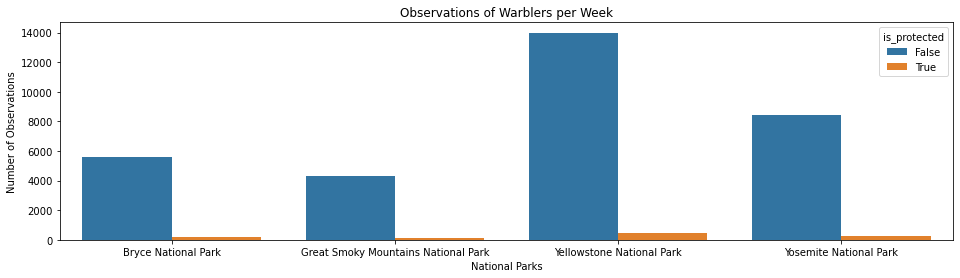

In [89]:
plt.figure(figsize=(16, 4))
sns.barplot(x=obs_by_park.park_name, y= obs_by_park.observations, hue=obs_by_park.is_protected)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Warblers per Week')
plt.show()

Yellowstone sees the largest number of observations of Warblers per week, both the protected and unprotected species. 
Lastly, lets see counts of each protected warbler species  in each park. 

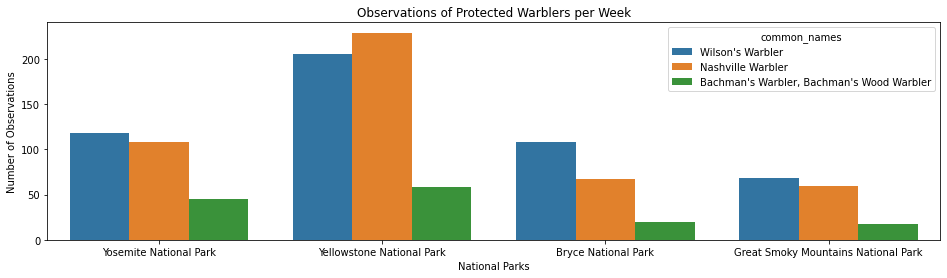

In [101]:
protected_warblers.groupby(['park_name','common_names']).observations.sum().reset_index()
plt.figure(figsize=(16, 4))
sns.barplot(x=protected_warblers.park_name, y= protected_warblers.observations, hue=protected_warblers.common_names)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Protected Warblers per Week')
plt.show()

Of the 3 protected warbler species, the majority are recorded in Yellowstone (previous plot indicated most warblers,protected or not, were found there). The most common warbler species in Yellowstone was the Nashville warbler. 

Conclusions:


    -> There are lots of sightings recorded in the National Parks- the majority of sightings are of species with a conservation status of 'No Intervention' (this makes sense, more commonly seen if not endangered)   
    
    ->Vascular plants and birds are the predominant species groups that have species with a 'No Intervention' status   
    -> The most commonly recorded observation across all parks was the vascular plant, Lycopodium tristachyum, a moss.   
    
    -> At the species group level,mammals and birds have the highest proportions of species that are endangered   
    
    -> When protection status was examined, the proportions of protected vs unprotected species were not different between birds and mammals but were different between mammals and vascular plants    
    
    -> At the conservation status level, mammals and birds also had the highest proportion of species in recovery (good news)   
    -> There was no significant difference between birds versus mammals in terms of protected vs non protected species (p=0.69)   
    
    -> We looked at birds in further depth to see the most common type of bird identified across the parks, Warblers
    -> There were 39 warbler species IDed in the parks, 3 were protected species
    -> Yellowstone park had the  most warbler seen, of the protected species the Nashville Warbler was most commmon there
    
   -> This is a 7 day dataset. For exploring conservation status and species recovery a longitudinal dataset would be of more interest and representative
   